<a href="https://colab.research.google.com/github/dathrika13/cs666student/blob/main/CS666_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

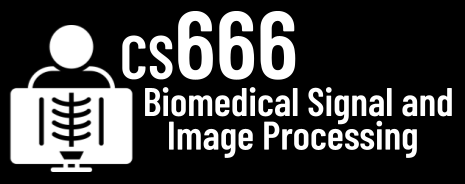
# Assignment 7

In [4]:
# NAME: Dathrika Saicharitha

In [5]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute.

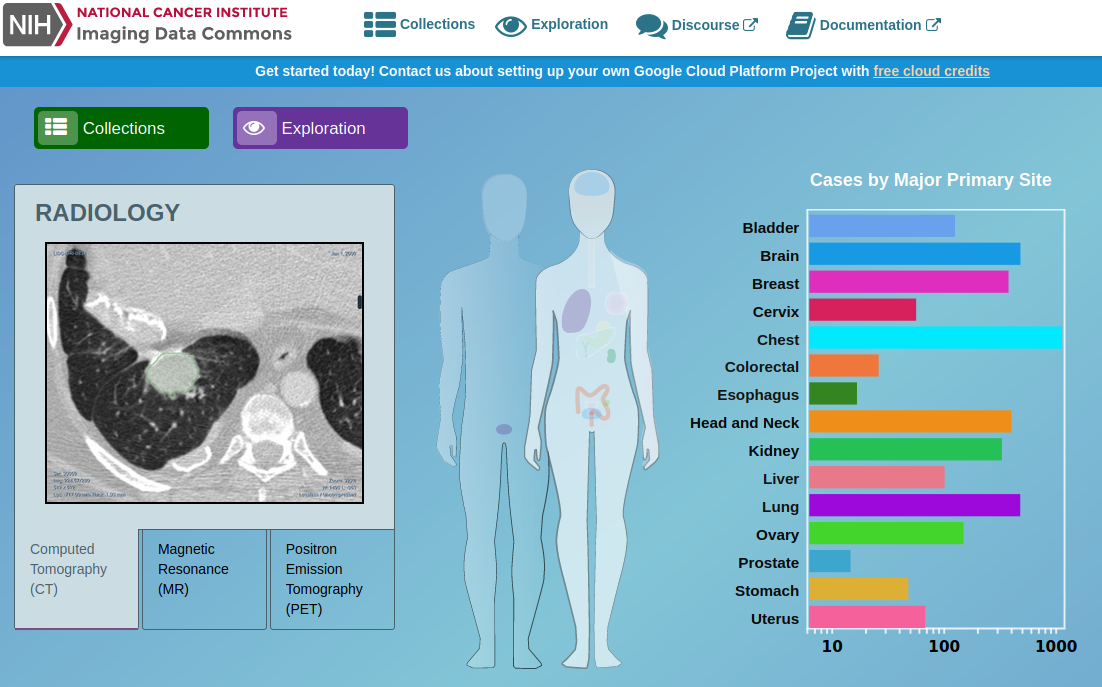

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [10 Points]

In [6]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [7]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [8]:
#
# TODO: REPLACE WITH DIRECT URL TO YOUR SELECTED CASE
# https://viewer.imaging.datacommons.cancer.gov/viewer/1.3.6.1.4.1.14519.5.2.1.3098.5025.446552627803437362962184530634

In [9]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

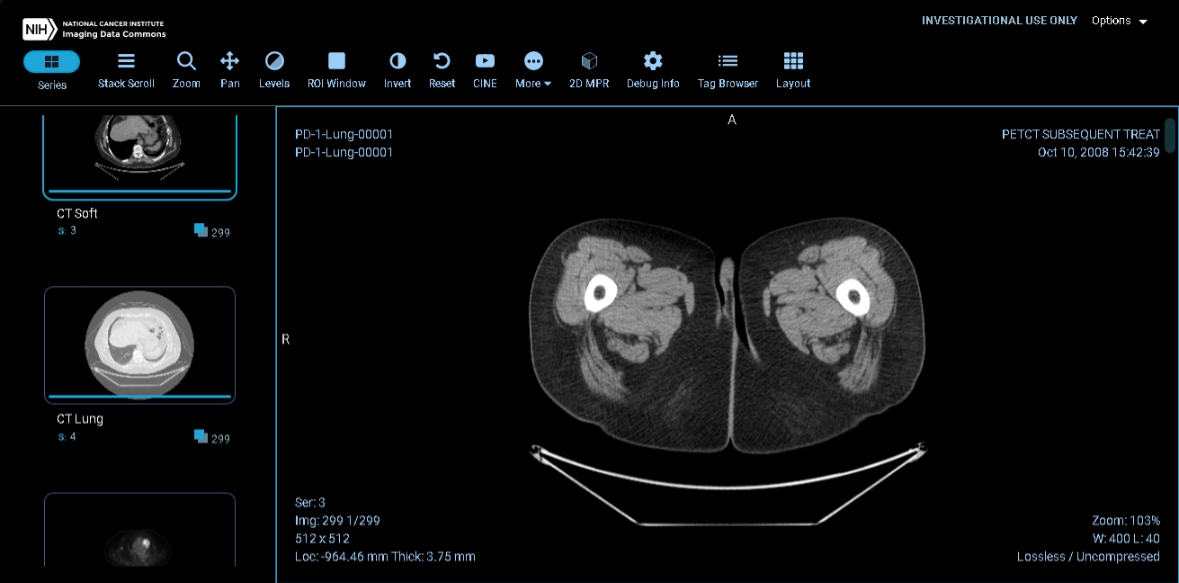

**Task 2**: Visualize structural and PET side-by-side! [20 Points]

In [10]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

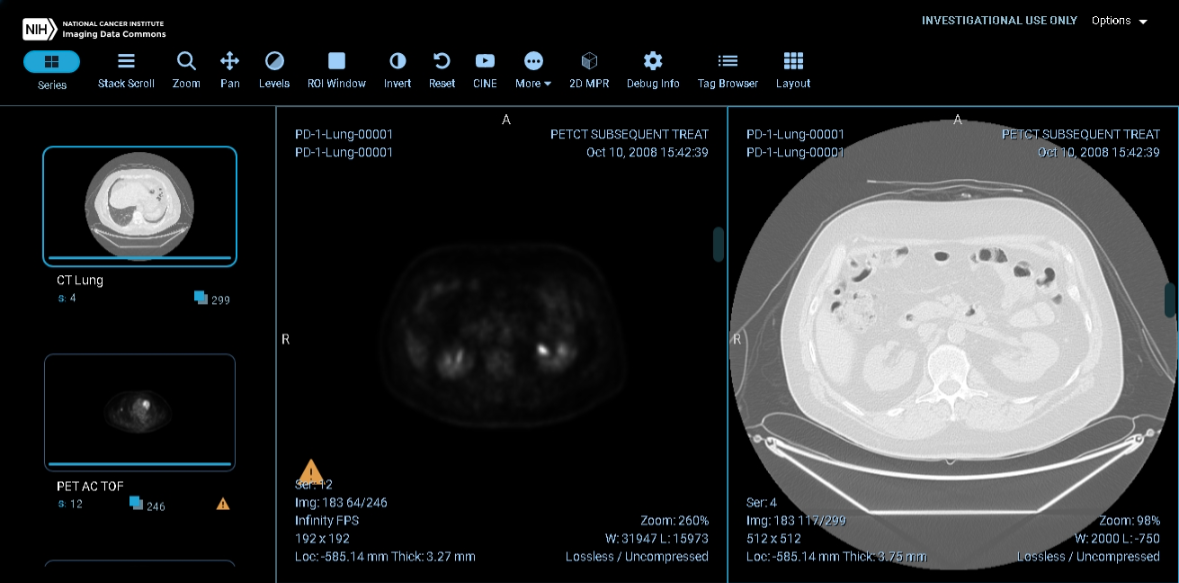

In [11]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [12]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [13]:
# TODO: Paste a screenshot showing the 2-column layout below.

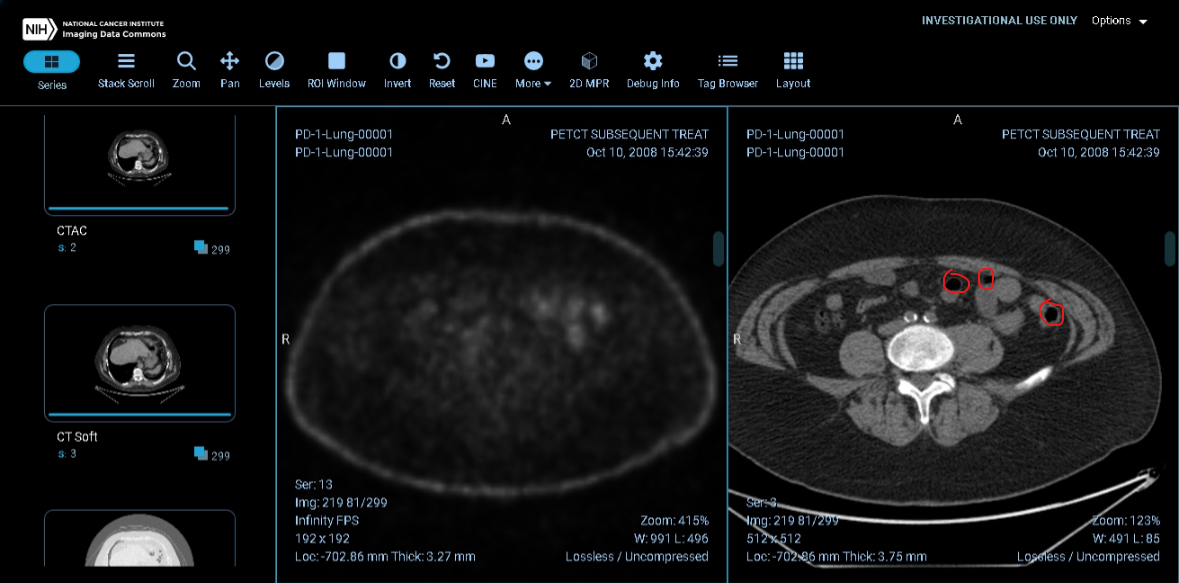

**Task 3**: Let's access the pixel data! [20 Points]

In [14]:
#
# IMPORTANT: SWITCH BACK TO THE STANDARD LAYOUT (1-column) or RELOAD THE PAGE.
#
# AND: Visualize the CT/MRI scan rather than the PET scan for this task.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [15]:
# 1) Open the Developer Tools of your browser and access the JS console.

In [16]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
#   element = cornerstone.getEnabledElements()[0];
#   pixels = element.image.getPixelData();
#

In [17]:
# 3): What is the minimum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [18]:
#
#
# TODO: YOUR CODE GOES HERE

# minimumPixelValue = Number.POSITIVE_INFINITY;

# pixels.forEach(function(pixelValue) {
#     if (pixelValue < minimumPixelValue) {
#         minimumPixelValue = pixelValue;
#     }
# });

# console.log("The minimum pixel value of the current slice is:", minimumPixelValue);

In [19]:
# TODO: MINIMUM VALUE OF THE SLICE

#The minimum pixel value of the current slice is: -1024

**Task 4**: Let's apply a 3x3 filter mask! [30 Points]

In [20]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Sobel, Gaussian blur, edge detection..).
#
# After setting new pixel values, you can re-draw/re-render the current slice with this command:
#
#   cornerstone.renderGrayscaleImage(element, true);
#

In [21]:
#
#
# TODO: YOUR CODE GOES HERE
#

# var element = cornerstone.getEnabledElements()[0];
# var pixels = element.image.getPixelData();
# var w = element.image.width;
# var h = element.image.height;

# // Create a new array to store the modified pixel values
# var newPixels = new Int16Array(pixels.length);

# // Apply the Gaussian blur filter
# for (var y = 1; y < h - 1; y++) {
#     for (var x = 1; x < w - 1; x++) {
#         var pixelIndex = y * w + x;
#         var blurredValue =
#             (pixels[(y - 1) * w + (x - 1)] +
#              pixels[(y - 1) * w + x] +
#              pixels[(y - 1) * w + (x + 1)] +
#              pixels[y * w + (x - 1)] +
#              pixels[pixelIndex] +
#              pixels[y * w + (x + 1)] +
#              pixels[(y + 1) * w + (x - 1)] +
#              pixels[(y + 1) * w + x] +
#              pixels[(y + 1) * w + (x + 1)]) / 9;

#         newPixels[pixelIndex] = blurredValue;
#     }
# }

# // Set the new pixel values
# pixels.set(newPixels);

# // Re-render the current slice
# cornerstone.renderGrayscaleImage(element, true);



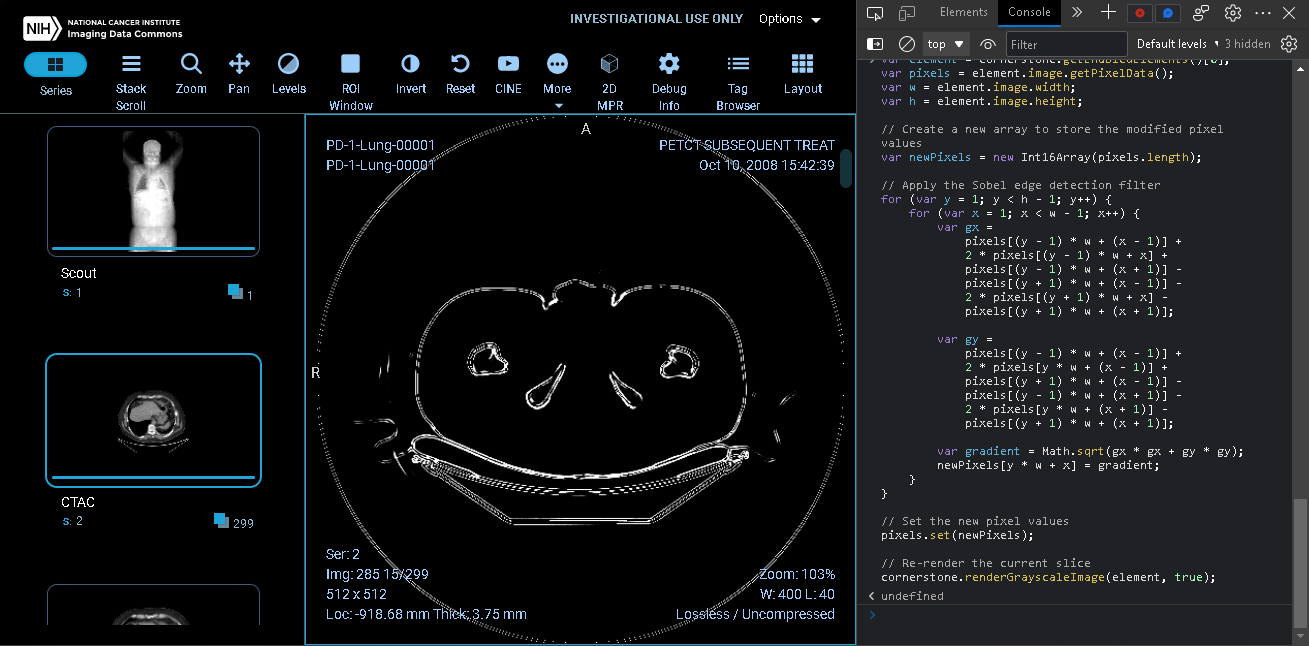

**Task 5**: Use the Segment Anything model to annotate the scan. [20 Points]

In [22]:
#
# Now we will use the bookmarklet to run Meta's Segment Anything model on the data.
#
# 1) Visit https://cs666.org/sam/ and install the bookmarklet.
#
# 2) Run the model on a structure of your choice.
#    HINT: The video shows how to do it https://www.youtube.com/watch?v=2kxrqQfjsQw
#
# 3) Take a screenshot of the result.
#

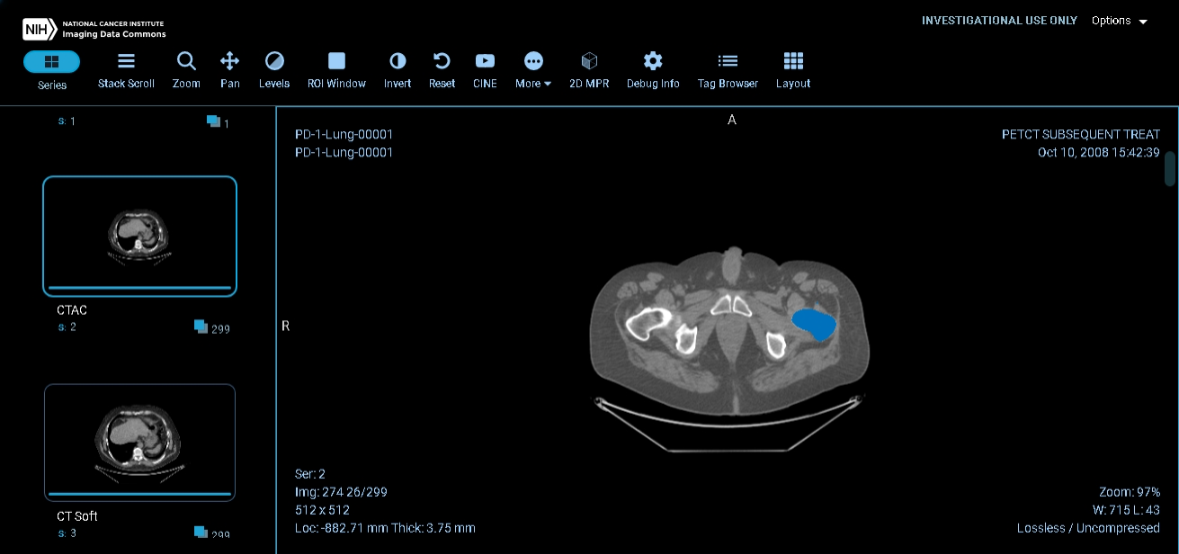

In [23]:
#
# 4) Now, please study the code of the bookmarklet.
#    See https://gist.github.com/haehn/bbec8cf8442adea5bb10c08d9c3cc13f
#
#    TODO: What is the main difference between processing with the bookmarklet
#          versus the kernel mask filtering from above in terms of accessing
#          the pixels?
#

# The bookmarklet code accesses and modifies pixel data directly from the 
# canvas element using getImageData(). The kernel mask filtering code uses 
# the Cornerstone library to access pixel data from the enabled slice 
# and applies a filter mask algorithm before re-rendering.

In [ ]:
# collaborated with Manasa-01

**Bonus 1**: Create a Segment Anything bookmarklet for NiiVue.js-based installations. [33 Points]

In [24]:
#
# Similar to the code from Task 5, please create a bookmarklet (JS injection) 
# for a NiiVue.js-based visualization such as: https://mpsych.github.io/CACTAS/
#
# HINT: nv.drawSelectionBox([x,y,w,h]) draws a selection box and here is a related
#       github issue: https://github.com/niivue/niivue/issues/596
#
# HINT2: You will want to hide the blue orientation lines before grabbing the
#        canvas pixels.
#          nv.setCrosshairColor([0, 0, 0, 0]);
#          nv.opts.crosshairWidth = 0.;
#          nv.updateGLVolume();
#
# HINT3: The CACTAS repo has a lot of useful NiiVue.js code snippets
#        https://github.com/mpsych/cactas
#

**Bonus 2**: Plugin your NiiVue.js bookmarklet on OpenNeuro.org. [Summer Job]

In [ ]:
#
# Integrate the Segment Anything bookmarklet with OpenNeuro.org, for example here:
# https://openneuro.org/datasets/ds004513/versions/1.0.2/file-display/sub-s033:ses-open:anat:sub-s033_ses-open_T1w.nii.gz
#
# And here is a related Github issue: https://github.com/OpenNeuroOrg/openneuro/issues/2815
#
# STRETCH GOALS TO STRENGTHEN YOUR APPLICATION:
#  1. Run on pixel data rather than canvas imagedata.
#  2. Run in 3D!
#

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#